# Logistic Regression - Categorical Variables
Logistic regression assumes that the class attribute has only two values (e.g., good/bad, 1/0, 1/-1). When facing a problem with more class values, there are two options for applying a two value classifier. One can build one classifier for each class value and train it against all the other classes. Otherwise, one can minimize the loss using on the multinomial loss fit across the entire probability distribution.

In this example, we apply logistic regression using the <b>one versus the rest</b> evaluation using a well-known dataset called <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">Iris</a>

First we load all the needed libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import model_selection
from sklearn.model_selection import KFold
%matplotlib inline

Next, we load the dataset.

In [2]:
weather = pd.read_csv('Weather.csv')
weather.head(5)

Outlook Temperature Humidity  Windy Play
0     sunny         hot     high  False   no
1     sunny         hot     high   True   no
2  overcast         hot     high  False  yes
3     rainy        mild     high  False  yes
4     rainy        cool   normal  False  yes

And we get some stats

In [3]:
weather.describe()

Outlook Temperature Humidity  Windy Play
count       14          14       14     14   14
unique       3           3        2      2    2
top      rainy        mild   normal  False  yes
freq         5           6        7      8    9

We define the class attribute by encoding the Play attribute as a +1/-1 attribute

In [4]:
weather['Class'] = weather['Play'].apply(lambda x: 1 if x=='yes' else -1);
weather = weather.drop('Play',1);

We now defined the input variables and the output variable.

In [5]:
target = 'Class'
variables = weather.columns[weather.columns!=target]

We now map the categorical/nominal variables into 0/1 variables using one-hot-encoding approach

In [6]:
weather_binary = weather

for v in variables:
    ohe = pd.get_dummies(weather[v])

    names = [x for x in ohe.columns]

    new_names = {}

    for n in names:
        new_names[n] = str(v)+"."+str(n)

    ohe.rename(columns=new_names, inplace = True)

    weather_binary = weather_binary.drop(v,1)

    for vv in ohe.columns:
       weather_binary[vv] = ohe[vv]

In [7]:
weather_binary.head(5)

Class  Outlook.overcast  Outlook.rainy  Outlook.sunny  Temperature.cool  \
0     -1                 0              0              1                 0   
1     -1                 0              0              1                 0   
2      1                 1              0              0                 0   
3      1                 0              1              0                 0   
4      1                 0              1              0                 1   

   Temperature.hot  Temperature.mild  Humidity.high  Humidity.normal  \
0                1                 0              1                0   
1                1                 0              1                0   
2                1                 0              1                0   
3                0                 1              1                0   
4                0                 0              0                1   

   Windy.False  Windy.True  
0            1           0  
1            0           1  
2            1           0  
3            1           0  
4            1           0

Now we can apply a logistic regression model using the new version of the dataset.

Average accuracy = 0.55 +/- 0.42


Index(['Outlook.overcast', 'Outlook.rainy', 'Outlook.sunny',
       'Temperature.cool', 'Temperature.hot', 'Temperature.mild',
       'Humidity.high', 'Humidity.normal', 'Windy.False', 'Windy.True'],
      dtype='object')

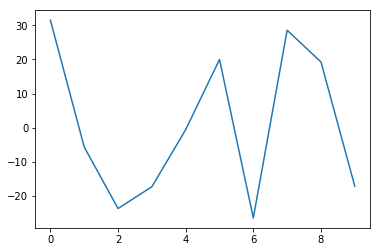

In [8]:
target = 'Class'
variables = weather_binary.columns[weather_binary.columns!=target]

x = weather_binary[variables] 
y = weather_binary[target] 

logistic = linear_model.LogisticRegression(C=10e10, random_state=1234)
logistic.fit(x,y)
xval = model_selection.cross_val_score(logistic, x, y, cv=KFold(n_splits=10, random_state=1234, shuffle=True))

print ("Average accuracy = %3.2f +/- %3.2f" %(np.average(xval),np.std(xval)))

plt.plot(logistic.coef_[0])
variables

## Question
- How would you evaluate this result? It is bad, but not too bad, correct?
- Would it improve using L1 or L2 regularization?
- Would it improve using L1 or L2 regularization